In [1]:
%load_ext autoreload
%autoreload 2

In [37]:
from PIL import Image
from pigs import Pigs
import matplotlib.pyplot as plt

image = Image.open('pigs.jpg').convert('LA')
image = image.resize((32,32))

pig = Pigs(stop=1e-3, verbose=True, beta=10)
# pass image or image path or np.array
# pig.segment(image)
    

# if __name__ == '__main__':
#     main()

In [38]:

# 01.
flat_image = pig.flatter(image)
# 02.
gram = pig.compute_gram(flat_image)


Image shape: (32, 32, 2)


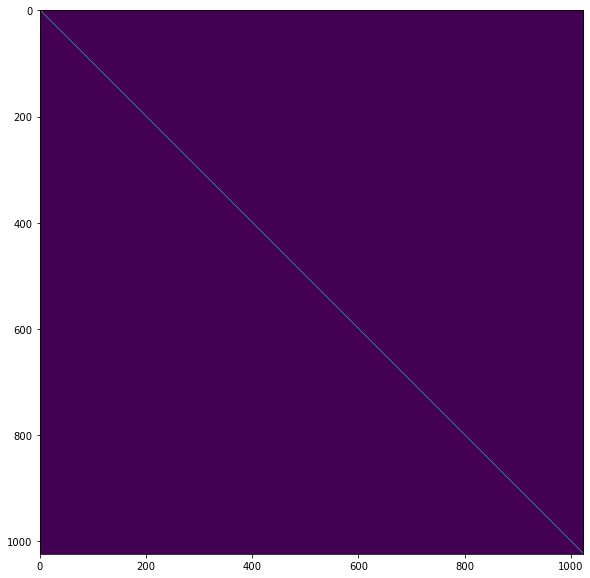

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(gram)

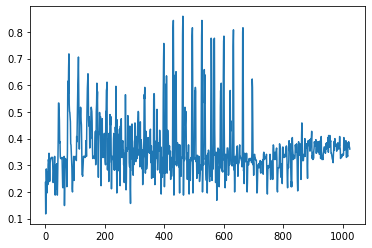

In [40]:
plt.plot(flat_image)

In [41]:
degree, laplace = pig.compute_LD(gram)


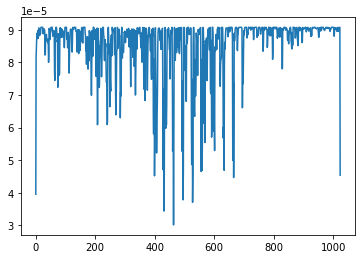

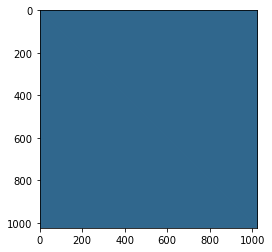

In [42]:
plt.figure()
plt.plot(degree)
plt.figure()
plt.imshow(laplace)

In [43]:
# # 04.
x = pig.linear_solver(degree, laplace)
# # 05.

Root node: 21
[3.95316752e-05 8.13844137e-05 8.45440643e-05 ... 9.06882861e-05
 9.07719404e-05 4.53720107e-05]
[[ 3.95316752e-05 -3.95316752e-05 -4.21646083e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-3.95316752e-05  8.13844137e-05 -4.18527386e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-4.21646083e-18 -4.18527386e-05  8.45440643e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ...  9.06882861e-05
  -4.53999298e-05 -4.24574169e-18]
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ... -4.53999298e-05
   9.07719404e-05 -4.53720107e-05]
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ... -4.24574169e-18
  -4.53720107e-05  4.53720107e-05]]


In [49]:
threshold, ir = pig.compute_IR_threshold(x, gram, degree)
mask = 
mask = x > threshold

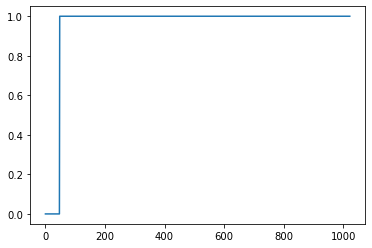

In [50]:
plt.plot(mask)

In [51]:
gram[mask].shape

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1024 but corresponding boolean dimension is 1023